In [1]:
from root_pandas import read_root
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from skhep.visual import MplPlotter as skh_plt
import pickle
import os

%jsroot off
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.16/00


In [2]:
os.makedirs('./plots', exist_ok=True)
TitleOffset_XY = 1.4
TitleOffset_Z = 1.3
Canvas_phi = 40
ROOT.gStyle.SetPalette(55)
MaxZ = 0.0045

Info in <TCanvas::Print>: png file ./plots/Correlation-sig-20k-dEta11-dPt1to2.png has been created
Info in <TCanvas::Print>: pdf file ./plots/Correlation-sig-20k-dEta11-dPt1to2.pdf has been created


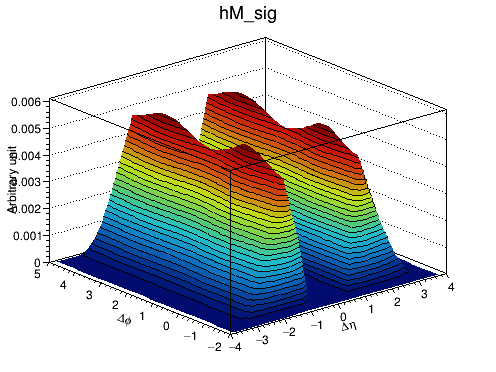

In [3]:
f = ROOT.TFile('./plots/hist_corr_20k.root','READ')
hM_sig = f.Get('hM_sig')
c = ROOT.TCanvas('c','c',500,400)
c.cd()
hM_sig.Scale(1./hM_sig.GetEntries())
hM_sig.GetXaxis().SetTitle('#Delta#eta')
hM_sig.GetYaxis().SetTitle('#Delta#phi')
hM_sig.GetZaxis().SetTitle('Arbitrary unit')
hM_sig.GetXaxis().SetTitleOffset(TitleOffset_XY)
hM_sig.GetYaxis().SetTitleOffset(TitleOffset_XY)
hM_sig.GetZaxis().SetTitleOffset(TitleOffset_Z)
hM_sig.GetXaxis().CenterTitle()
hM_sig.GetYaxis().CenterTitle()
hM_sig.GetZaxis().CenterTitle()
# hM_sig.GetZaxis().SetRangeUser(0,MaxZ)
hM_sig.SetLineColor(1)
hM_sig.SetContour(30)
ROOT.gPad.SetPhi(Canvas_phi)
hM_sig.Draw('surf2')
hM_sig.Draw('CONT1 SAME')
c.Draw()
c.SaveAs('./plots/Correlation-sig-20k-dEta11-dPt1to2.png')
c.SaveAs('./plots/Correlation-sig-20k-dEta11-dPt1to2.pdf')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/Correlation-bkg-20k-dEta11-dPt1to2.png has been created
Info in <TCanvas::Print>: pdf file ./plots/Correlation-bkg-20k-dEta11-dPt1to2.pdf has been created


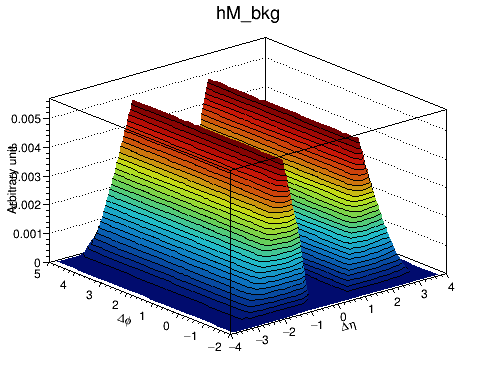

In [4]:
hM_bkg = f.Get('hM_bkg')
c = ROOT.TCanvas('c','c',500,400)
c.cd()
hM_bkg.Scale(1./hM_bkg.GetEntries())
hM_bkg.GetXaxis().SetTitle('#Delta#eta')
hM_bkg.GetYaxis().SetTitle('#Delta#phi')
hM_bkg.GetZaxis().SetTitle('Arbitrary unit')
hM_bkg.GetXaxis().SetTitleOffset(TitleOffset_XY)
hM_bkg.GetYaxis().SetTitleOffset(TitleOffset_XY)
hM_bkg.GetZaxis().SetTitleOffset(TitleOffset_Z)
hM_bkg.GetXaxis().CenterTitle()
hM_bkg.GetYaxis().CenterTitle()
hM_bkg.GetZaxis().CenterTitle()
# hM_bkg.GetZaxis().SetRangeUser(0,MaxZ)
hM_bkg.SetLineColor(1)
hM_bkg.SetContour(30)
ROOT.gPad.SetPhi(Canvas_phi)
hM_bkg.Draw('surf2')
hM_bkg.Draw('CONT1 SAME')
c.Draw()
c.SaveAs('./plots/Correlation-bkg-20k-dEta11-dPt1to2.png')
c.SaveAs('./plots/Correlation-bkg-20k-dEta11-dPt1to2.pdf')

In [5]:
def fineMinMax(hist):
    mini = 999.
    maxi = -1.
    for i in range(hist.GetNbinsX()):
        for j in range(hist.GetNbinsY()):
            if hist.GetBinContent(i+1,j+1) < mini and hist.GetBinContent(i+1,j+1) > 0.0:
                mini = hist.GetBinContent(i+1,j+1)
        
            if hist.GetBinContent(i+1,j+1) > maxi:
                maxi = hist.GetBinContent(i+1,j+1)
                
    return mini,maxi

0.932334840297699 1.0723284482955933


Info in <TCanvas::Print>: png file ./plots/Correlation-alt1-20k-dEta11-dPt1to2.png has been created
Info in <TCanvas::Print>: pdf file ./plots/Correlation-alt1-20k-dEta11-dPt1to2.pdf has been created


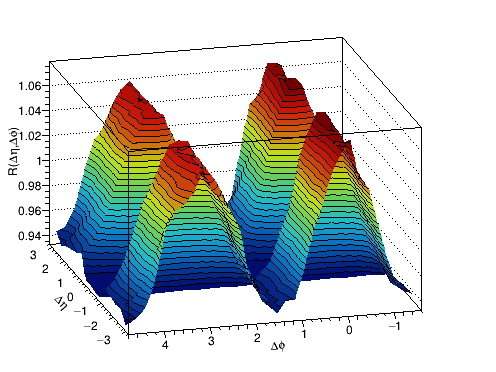

In [7]:
h_ratio = hM_sig.Clone()
h_ratio.Divide(hM_bkg)
(minimum,maximum) = fineMinMax(h_ratio)
print (minimum, maximum)
# h_ratio.Add(h_ratio,-minimum)
c.cd()
ROOT.gPad.SetRightMargin(0.15)
ROOT.gPad.SetTicks()
c.Update()
h_ratio.GetXaxis().SetTitle('#Delta#eta')
h_ratio.GetYaxis().SetTitle('#Delta#phi')
h_ratio.GetZaxis().SetTitle('R(#Delta#eta,#Delta#phi)')
h_ratio.GetXaxis().SetTitleOffset(TitleOffset_XY)
h_ratio.GetYaxis().SetTitleOffset(TitleOffset_XY)
h_ratio.GetZaxis().SetTitleOffset(TitleOffset_Z)
h_ratio.GetXaxis().CenterTitle()
h_ratio.GetYaxis().CenterTitle()
h_ratio.GetZaxis().CenterTitle()
h_ratio.GetXaxis().SetRangeUser(-ROOT.TMath.Pi(),ROOT.TMath.Pi())
h_ratio.GetYaxis().SetRangeUser(-0.5*ROOT.TMath.Pi(),1.5*ROOT.TMath.Pi())
h_ratio.SetMaximum(1.2)
h_ratio.SetMinimum(0.0)
# h_ratio.GetZaxis().SetRangeUser(minimum,1.03*maximum)
h_ratio.GetZaxis().SetRangeUser(minimum,maximum)
h_ratio.SetLineColor(1)
h_ratio.SetContour(30)
ROOT.gPad.SetPhi(105)
ROOT.gPad.SetTheta(27)
ROOT.gStyle.SetPalette(55)
# h_ratio.Draw('colz')
h_ratio.SetTitle('')
h_ratio.Draw('surf2')
h_ratio.Draw('CONT1 same')
c.Draw()
c.SaveAs('./plots/Correlation-alt1-20k-dEta11-dPt1to2.png')
c.SaveAs('./plots/Correlation-alt1-20k-dEta11-dPt1to2.pdf')

 FCN=1115.23 FROM MIGRAD    STATUS=CONVERGED      45 CALLS          46 TOTAL
                     EDM=2.95872e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.12810e-02   5.87399e-06   9.56249e-08  -1.31199e+00
   2  p1           9.39295e-04   4.15195e-06   6.75911e-08   7.80018e-02


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/Correlation-projY-20k-dEta11-dPt1to2.png has been created
Info in <TCanvas::Print>: pdf file ./plots/Correlation-projY-20k-dEta11-dPt1to2.pdf has been created


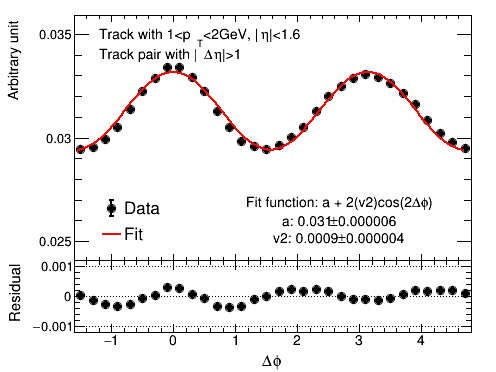

In [22]:
def fit_hist(hist):
    f1 = ROOT.TF1('f1', '[0] + 2 * [1]*cos(2*x)', -0.5 * ROOT.TMath.Pi(),
                  1.5 * ROOT.TMath.Pi())
    hist.Fit(f1, '', '', -0.5 * ROOT.TMath.Pi(), 1.5 * ROOT.TMath.Pi())

    return f1, (f1.GetParameter(0), f1.GetParError(0)), (f1.GetParameter(1),
                                                         f1.GetParError(1))


hM_ProjY = h_ratio.ProjectionY()
hM_ProjY.Sumw2()
hM_ProjY.Scale(1. / hM_ProjY.Integral(-1, -1))
hM_ProjY_subtracted = hM_ProjY.Clone()

c = ROOT.TCanvas('c', 'c', 500, 400)
Plot_Pad1 = ROOT.TPad('pad1', '', 0, 0.3, 1, 1)
Plot_Pad1.SetRightMargin(0.05)
Plot_Pad1.SetLeftMargin(0.15)
Plot_Pad1.SetBottomMargin(0.0)
Plot_Pad1.SetTopMargin(0.06)
Plot_Pad1.SetTicks()
Plot_Pad1.Draw()
Plot_Pad2 = ROOT.TPad('pad2', '', 0, 0, 1, 0.3)
Plot_Pad2.SetRightMargin(0.05)
Plot_Pad2.SetLeftMargin(0.15)
Plot_Pad2.SetTopMargin(0.0)
Plot_Pad2.SetBottomMargin(0.35)
Plot_Pad2.SetTicks()
Plot_Pad2.SetGridy()
Plot_Pad2.Draw()

Plot_Pad1.cd()
# hM_ProjY.GetXaxis().SetTitle('#Delta#phi')
hM_ProjY.GetYaxis().SetTitle('Arbitrary unit')
hM_ProjY.GetXaxis().SetTitleSize(0.05)
hM_ProjY.GetYaxis().SetTitleSize(0.06)
hM_ProjY.GetXaxis().SetLabelSize(0.05)
hM_ProjY.GetYaxis().SetLabelSize(0.055)
hM_ProjY.GetXaxis().SetTitleOffset(1.0)
hM_ProjY.GetYaxis().SetTitleOffset(1.25)
# hM_ProjY.GetYaxis().SetRangeUser(0.7 * hM_ProjY.GetMaximum(),1.1 * hM_ProjY.GetMaximum())
hM_ProjY.GetYaxis().SetRangeUser(0.0241,0.0359)
hM_ProjY.GetYaxis().SetNdivisions(503)
hM_ProjY.SetMarkerStyle(20)
hM_ProjY.SetMarkerSize(1)
hM_ProjY.SetLineWidth(2)
hM_ProjY.Draw('pe1X0')
result_func, (a, aerr), (v2, v2err) = fit_hist(hM_ProjY)

# Set fit results
stats = ROOT.TPaveText(0.45, 0.05, 0.92, 0.25, 'NDC')
stats.SetTextFont(42)
stats.AddText('Fit function: a + 2(v2)cos(2#Delta#phi)')
stats.AddText('a: {0:.3f}#pm{1:.6f}'.format(a, aerr))
stats.AddText('v2: {0:.4f}#pm{1:.6f}'.format(v2, v2err))
stats.SetBorderSize(0)
stats.SetFillStyle(0)
stats.Draw('same')

# Set legend
leg = ROOT.TLegend(0.2, 0.05, 0.4, 0.25)
leg.AddEntry(hM_ProjY, 'Data', 'eX0p')
leg.AddEntry(result_func, 'Fit', 'l')
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.Draw('same')

# Set auxiliary info
latex = ROOT.TLatex()
latex.SetNDC()
latex.SetTextFont(42)
latex.SetTextSize(0.06)
latex.DrawLatex(0.2, 0.85, 'Track with 1<p_{T}<2GeV, |#eta|<1.6')
latex.DrawLatex(0.2, 0.77, 'Track pair with |#Delta#eta|>1')

c.Update()
Plot_Pad2.cd()
# Subtracted by the fit
for ibin in range(hM_ProjY_subtracted.GetNbinsX()):
    val = hM_ProjY_subtracted.GetBinContent(ibin + 1) - result_func.Eval(
        hM_ProjY_subtracted.GetBinLowEdge(ibin + 1) +
        0.5 * hM_ProjY_subtracted.GetBinWidth(ibin + 1))
    hM_ProjY_subtracted.SetBinContent(ibin + 1, val)
    

hM_ProjY_subtracted.GetYaxis().SetTitle('Residual')
hM_ProjY_subtracted.GetXaxis().SetTitle('#Delta#phi')
hM_ProjY_subtracted.GetYaxis().SetTitleSize(0.15)
hM_ProjY_subtracted.GetYaxis().SetTitleOffset(0.5)
hM_ProjY_subtracted.GetYaxis().SetLabelSize(0.13)
hM_ProjY_subtracted.GetYaxis().SetRangeUser(-0.0012,0.0012)
hM_ProjY_subtracted.GetXaxis().SetTitleSize(0.16)
hM_ProjY_subtracted.GetXaxis().SetTitleOffset(1.0)
hM_ProjY_subtracted.GetXaxis().SetLabelSize(0.14)
hM_ProjY_subtracted.GetXaxis().SetTickSize(0.1)
hM_ProjY_subtracted.GetYaxis().SetNdivisions(503)
hM_ProjY_subtracted.SetMarkerColor(1)
hM_ProjY_subtracted.SetMarkerSize(1)
hM_ProjY_subtracted.SetMarkerStyle(20)
hM_ProjY_subtracted.SetLineColor(1)
hM_ProjY_subtracted.SetLineWidth(2)
hM_ProjY_subtracted.Draw('pe1X0')

c.Update()
c.Draw()
c.SaveAs('./plots/Correlation-projY-20k-dEta11-dPt1to2.png')
c.SaveAs('./plots/Correlation-projY-20k-dEta11-dPt1to2.pdf')

## Exercise: generate dN/dPhi with known analytic function

In [8]:
f2 = ROOT.TF1('f2','[0] + 2 * [1]*cos(2*x)',-ROOT.TMath.Pi(),ROOT.TMath.Pi())
f2.SetParameters(1,0.1)
c = ROOT.TCanvas('c','c',500,400)
c.cd()
f2.Draw()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [9]:
hM_single = ROOT.TH1F('hM_single','',60,-ROOT.TMath.Pi(),ROOT.TMath.Pi())
hM_single.FillRandom('f2',100000)
hM_single.Sumw2()
hM_single.Scale(1./hM_single.Integral(-1,-1))
c = ROOT.TCanvas('c','c',500,400)
c.cd()
ROOT.gPad.SetTicks()
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetBottomMargin(0.12)
ROOT.gPad.SetTopMargin(0.06)
c.Update()
hM_single.GetXaxis().SetTitle('#phi')
hM_single.GetYaxis().SetTitle('A.U')
hM_single.GetXaxis().SetTitleSize(0.05)
hM_single.GetYaxis().SetTitleSize(0.05)
hM_single.GetXaxis().SetLabelSize(0.05)
hM_single.GetYaxis().SetLabelSize(0.05)
hM_single.GetXaxis().SetTitleOffset(1.1)
hM_single.GetYaxis().SetTitleOffset(1.1)
hM_single.SetMarkerStyle(24)
hM_single.SetMarkerSize(0.8)
hM_single.SetLineWidth(2)
hM_single.SetLineColor(1)
hM_single.Draw('pe1X0')
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [10]:
def deltaPhi(phi1, phi2):

      dPhi = phi1 - phi2
      if dPhi > ROOT.TMath.Pi():
            dPhi -= 2.*ROOT.TMath.Pi()
                    
      if dPhi < -ROOT.TMath.Pi():
            dPhi += 2.*ROOT.TMath.Pi()

      return dPhi



hM_dPhi = ROOT.TH1F('hM_dPhi','',60,-3.5,3.5)

for i in range(100000):
    phi1 = f2.GetRandom(-ROOT.TMath.Pi(),ROOT.TMath.Pi())
    phi2 = f2.GetRandom(-ROOT.TMath.Pi(),ROOT.TMath.Pi())
    hM_dPhi.Fill(deltaPhi(phi1,phi2))
    
hM_dPhi.Sumw2()
hM_dPhi.Scale(1./hM_dPhi.Integral(-1,-1))
c = ROOT.TCanvas('c','c',500,400)
c.cd()
ROOT.gPad.SetTicks()
ROOT.gPad.SetRightMargin(0.05)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetBottomMargin(0.12)
ROOT.gPad.SetTopMargin(0.06)
c.Update()
hM_dPhi.GetXaxis().SetTitle('#Delta#phi(#phi_{1}-#phi_{2})')
hM_dPhi.GetYaxis().SetTitle('A.U')
hM_dPhi.GetXaxis().SetTitleSize(0.05)
hM_dPhi.GetYaxis().SetTitleSize(0.05)
hM_dPhi.GetXaxis().SetLabelSize(0.05)
hM_dPhi.GetYaxis().SetLabelSize(0.05)
hM_dPhi.GetXaxis().SetTitleOffset(1.1)
hM_dPhi.GetYaxis().SetTitleOffset(1.35)
hM_dPhi.GetYaxis().SetRangeUser(0.55*hM_dPhi.GetMaximum(),1.15*hM_dPhi.GetMaximum())
hM_dPhi.SetMarkerStyle(24)
hM_dPhi.SetMarkerSize(0.8)
hM_dPhi.SetLineWidth(2)
hM_dPhi.SetLineColor(1)
hM_dPhi.Draw('pe1X0')

# Fit
f3 = ROOT.TF1('f3','[0] + 2*[1]*[1]*cos(2*x)',-ROOT.TMath.Pi(),ROOT.TMath.Pi())
hM_dPhi.Fit(f3,'','', -ROOT.TMath.Pi(),ROOT.TMath.Pi())

# Set fit results
stats = ROOT.TPaveText(0.4, 0.17, 0.87, 0.35, 'NDC')
stats.AddText('Fit function: a + 2(v2)^{2}cos(2#Delta#phi)')
stats.AddText('a: {0:.3f}#pm{1:.6f}'.format(f3.GetParameter(0),f3.GetParError(0)))
stats.AddText('v2: {0:.4f}#pm{1:.6f}'.format(f3.GetParameter(1),f3.GetParError(1)))
stats.SetBorderSize(0)
stats.SetFillStyle(0)
stats.Draw('same')

# Set legend
leg = ROOT.TLegend(0.2,0.17,0.35,0.35)
leg.AddEntry(hM_dPhi, 'Data', 'eX0p')
leg.AddEntry(f3, 'Fit', 'l')
leg.SetBorderSize(0)
leg.SetFillStyle(0)
leg.Draw('same')
    
c.Draw()
c.SaveAs('./plots/Correlation-exercise-dNdPhi.png')
c.SaveAs('./plots/Correlation-exercise-dNdPhi.pdf')

 FCN=70.626 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=4.4529e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.85049e-02   5.85387e-05   2.41905e-07  -1.56951e+01
   2  p1           1.01668e-02   2.02810e-03   8.25600e-06  -1.04384e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file ./plots/Correlation-exercise-dNdPhi.png has been created
Info in <TCanvas::Print>: pdf file ./plots/Correlation-exercise-dNdPhi.pdf has been created
